## 1. Function to Count Non-Black Pixels

In [103]:
from PIL import Image
import numpy as np

def count_non_black_pixels(image_path, threshold=30):
    img = Image.open(image_path)
    data = np.array(img)
    non_black_mask = (data[:, :, 0] > threshold) | (data[:, :, 1] > threshold) | (data[:, :, 2] > threshold)
    non_black_pixels = np.sum(non_black_mask)
    return non_black_pixels

In [104]:
from PIL import Image
import numpy as np

def count_intermediary_shade_pixels(image_path, hex1, hex2, tolerance=30):
    # Convert hex to RGB
    rgb1 = tuple(int(hex1[i:i+2], 16) for i in (0, 2, 4))
    rgb2 = tuple(int(hex2[i:i+2], 16) for i in (0, 2, 4))
    
    # Calculate min and max RGB values
    min_rgb = np.minimum(rgb1, rgb2) - tolerance
    max_rgb = np.maximum(rgb1, rgb2) + tolerance

    # Ensure RGB values are within acceptable range
    min_rgb = np.clip(min_rgb, 0, 255)
    max_rgb = np.clip(max_rgb, 0, 255)

    # Open the image
    img = Image.open(image_path)
    data = np.array(img)

    # Create a mask where the color condition is met
    mask = (data >= min_rgb) & (data <= max_rgb)
    combined_mask = mask[:, :, 0] & mask[:, :, 1] & mask[:, :, 2]

    # Count intermediary shade pixels
    intermediary_shade_pixels = np.sum(combined_mask)
    return intermediary_shade_pixels

# Example usage:
images = ['tsp-cv/18.jpg', 'tsp-cv/19.jpg', 'tsp-cv/20.jpg']
hex1 = "FF0000"  # Example hex color 1 (red)
hex2 = "00FF00"  # Example hex color 2 (green)

for image in images:
    intermediary_shade_pixels = count_intermediary_shade_pixels(image, hex1, hex2)
    print(f"Image: {image}")
    print(f"Intermediary shade pixels: {intermediary_shade_pixels}")

Image: tsp-cv/18.jpg
Intermediary shade pixels: 158770
Image: tsp-cv/19.jpg
Intermediary shade pixels: 267684
Image: tsp-cv/20.jpg
Intermediary shade pixels: 352790


#### Visualize it

Results for color_non_black_pixels:
tsp-cv/18.jpg


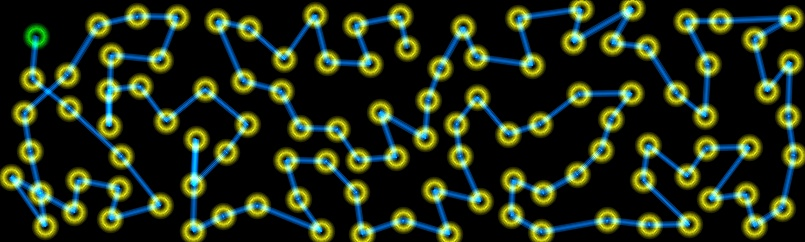

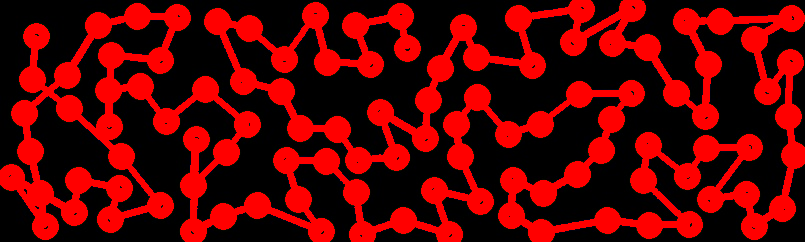

tsp-cv/19.jpg


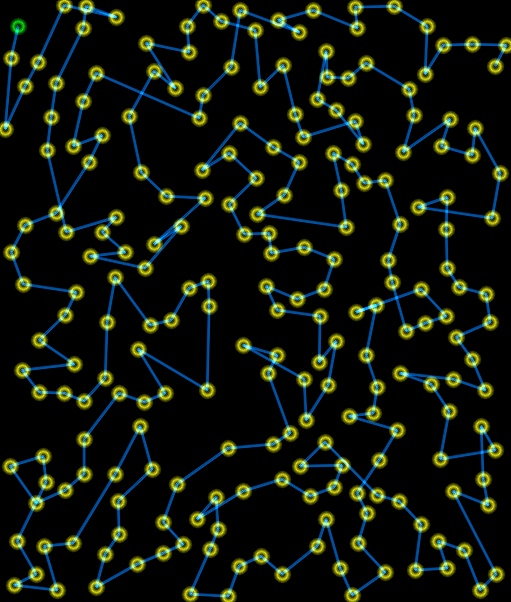

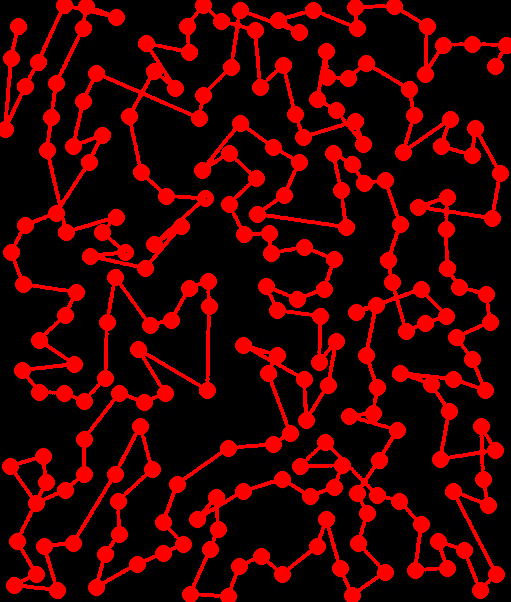

tsp-cv/20.jpg


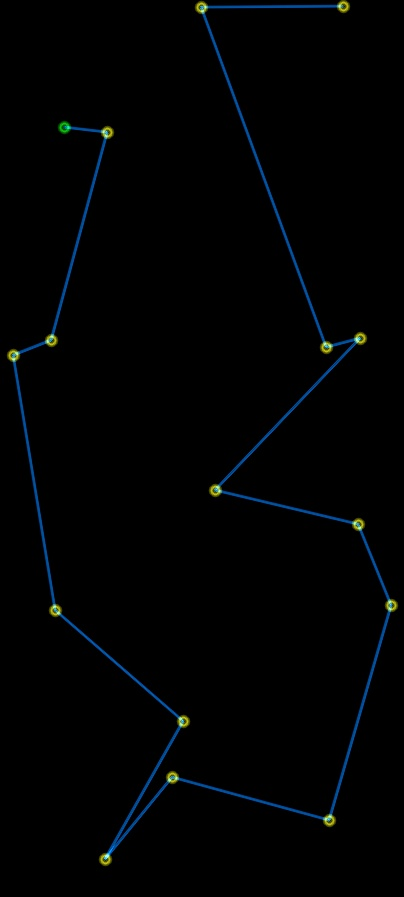

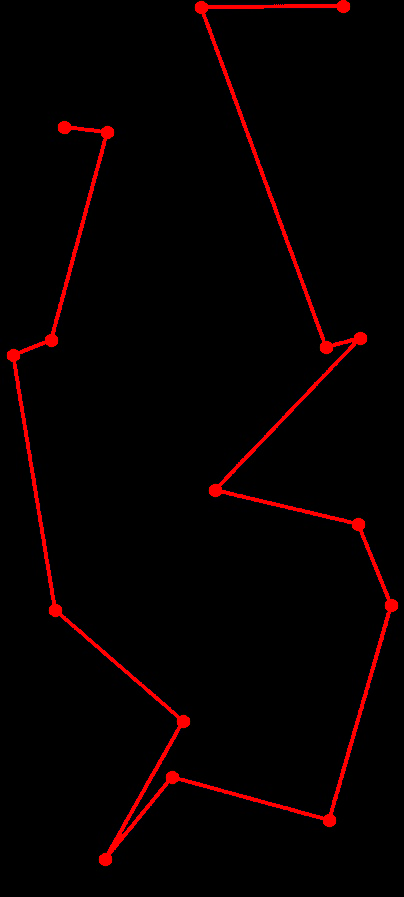


Results for color_intermediary_shades_with_threshold:
tsp-cv/18.jpg


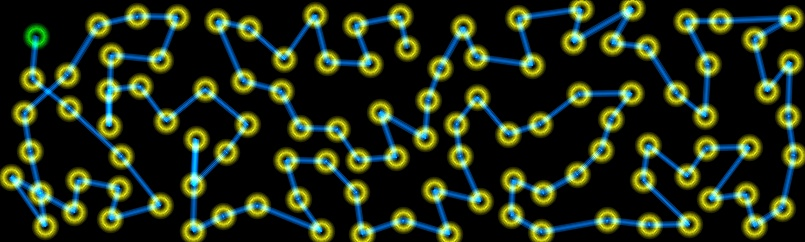

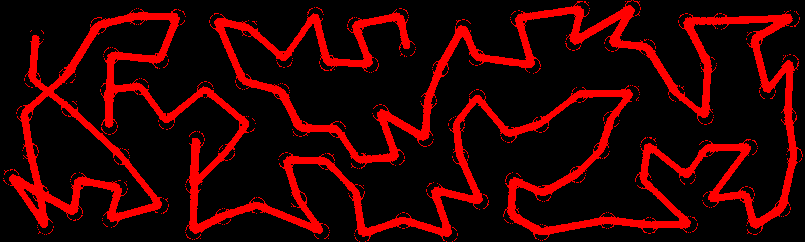

tsp-cv/19.jpg


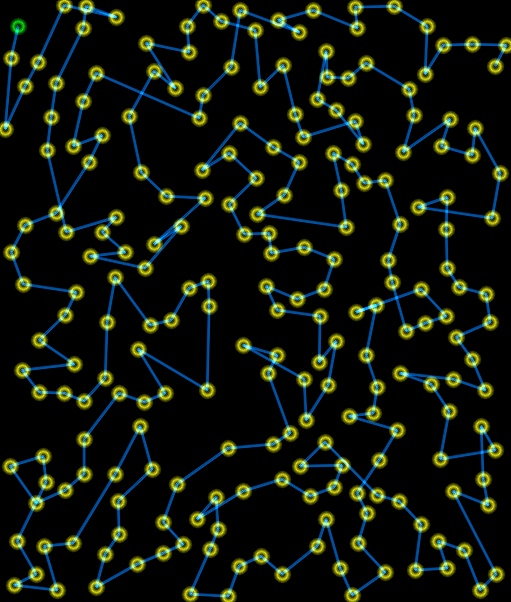

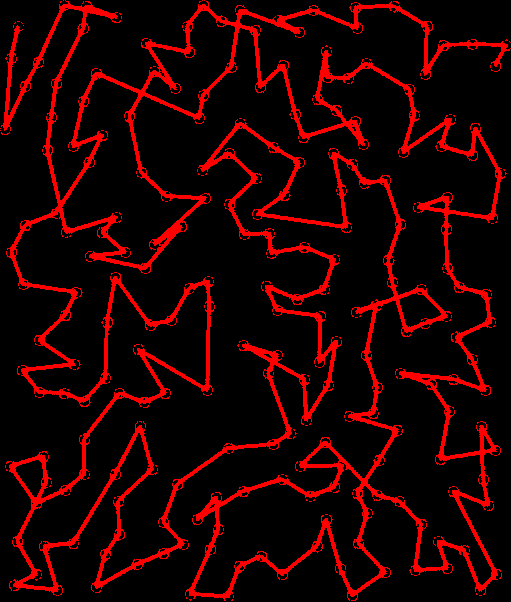

tsp-cv/20.jpg


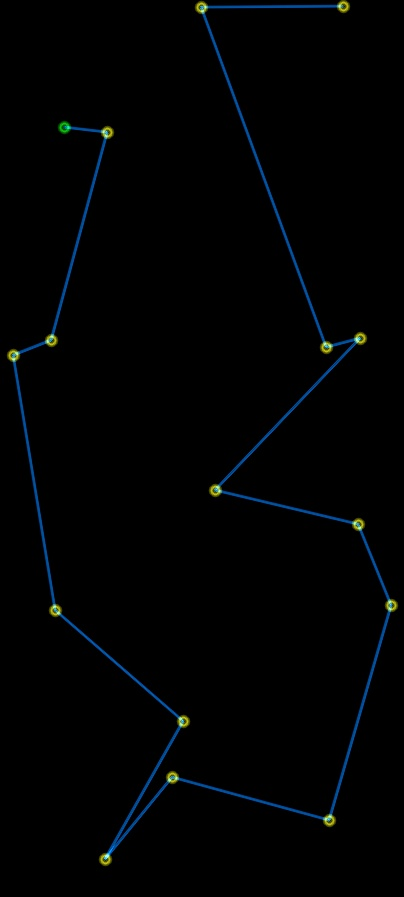

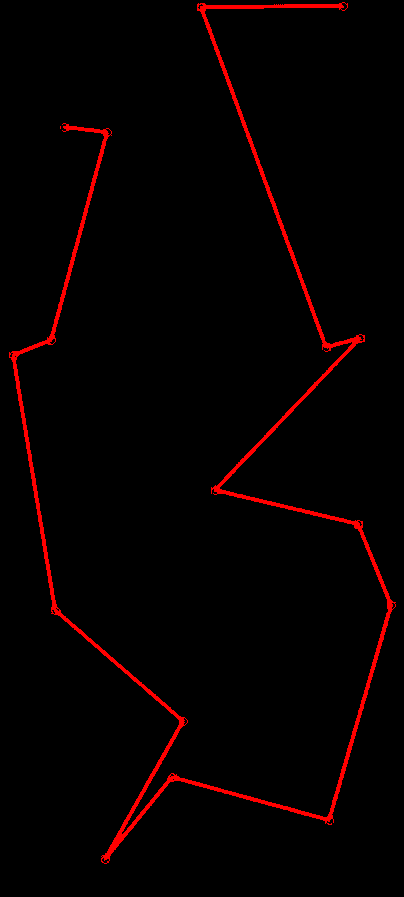

In [105]:
from PIL import Image
import numpy as np
from IPython.display import display

def color_non_black_pixels(image_path, threshold=30):
    # Open the image
    img = Image.open(image_path)
    data = np.array(img)

    # Create a mask where any RGB values are above the threshold (non-black)
    non_black_mask = (data[:, :, 0] > threshold) | (data[:, :, 1] > threshold) | (data[:, :, 2] > threshold)

    # Color matching pixels in red
    data[non_black_mask] = [255, 0, 0]

    # Convert array back to image
    new_img = Image.fromarray(data)
    display(img)
    display(new_img)  # Display the image inline in Jupyter notebook

def color_intermediary_shades_with_threshold(image_path, hex1, hex2, tolerance=30):
    # Convert hex to RGB
    rgb1 = tuple(int(hex1[i:i+2], 16) for i in (0, 2, 4))
    rgb2 = tuple(int(hex2[i:i+2], 16) for i in (0, 2, 4))
    
    # Calculate min and max RGB values
    min_rgb = np.minimum(rgb1, rgb2) - tolerance
    max_rgb = np.maximum(rgb1, rgb2) + tolerance

    # Ensure RGB values are within acceptable range
    min_rgb = np.clip(min_rgb, 0, 255)
    max_rgb = np.clip(max_rgb, 0, 255)

    # Open the image
    img = Image.open(image_path)
    data = np.array(img)

    # Create a mask where the color condition is met
    mask = (data >= min_rgb) & (data <= max_rgb)
    combined_mask = mask[:, :, 0] & mask[:, :, 1] & mask[:, :, 2]

    # Create a mask for the opposite pixels
    opposite_mask = ~combined_mask

    # Comment out this line to keep the original background
    data = np.zeros_like(data)

    # Color opposite pixels in red
    data[opposite_mask] = [255, 0, 0]

    # Convert array back to image
    new_img = Image.fromarray(data)
    display(img)
    display(new_img)  # Display the image inline in Jupyter notebook

# Example usage:
images = ['tsp-cv/18.jpg', 'tsp-cv/19.jpg', 'tsp-cv/20.jpg']

print("Results for color_non_black_pixels:")
for image in images:
    print(image)
    color_non_black_pixels(image)

print("\nResults for color_intermediary_shades_with_threshold:")
hex1 = "FF0000"  # Example hex color 1 (red)
hex2 = "00FF00"  # Example hex color 2 (green)
for image in images:
    print(image)
    color_intermediary_shades_with_threshold(image, hex1, hex2)

## 2. Process the Dataset

In [106]:
import pandas as pd

In [107]:
# Function to create the initial DataFrame
def create_initial_dataframe(data_frame, image_folder, hex1, hex2, tolerance):
    initial_data = []
    for filename in data_frame['filename']:
        image_path = f"{image_folder}/{filename}"
        non_black_pixels = count_non_black_pixels(image_path)
        intermediary_shade_pixels = count_intermediary_shade_pixels(image_path, hex1, hex2, tolerance)
        img = Image.open(image_path)
        width, height = img.size
        initial_data.append({
            'image_path': image_path,
            'non_black_pixels': non_black_pixels,
            'intermediary_shade_pixels': intermediary_shade_pixels,
            'width': width,
            'height': height
        })
    return pd.DataFrame(initial_data)

In [108]:
# Example usage:
data = pd.read_csv('tsp-cv/train.csv')
image_folder = 'tsp-cv'
hex1 = "FF0000"  # Example hex color 1 (red)
hex2 = "00FF00"  # Example hex color 2 (green)
tolerance = 30

In [109]:
# Create the initial DataFrame
initial_df = create_initial_dataframe(data, image_folder, hex1, hex2, tolerance)
print("Initial DataFrame:")
print(initial_df)

Initial DataFrame:
             image_path  non_black_pixels  intermediary_shade_pixels  width  \
0          tsp-cv/0.jpg            212918                     142628    503   
1          tsp-cv/1.jpg             12761                     193240    906   
2          tsp-cv/2.jpg            243499                     661132    810   
3          tsp-cv/3.jpg            146577                     480169    781   
4          tsp-cv/4.jpg            145465                     457117    609   
...                 ...               ...                        ...    ...   
16013  tsp-cv/16014.jpg             15022                     614798    839   
16014  tsp-cv/16015.jpg            180562                     444183    837   
16015  tsp-cv/16016.jpg              7981                     509541    550   
16016  tsp-cv/16017.jpg            203999                     509906    845   
16017  tsp-cv/16018.jpg             22429                     152231    667   

       height  
0         673  


## 3. Load Data and Prepare Features

In [110]:
# Function to create the feature set DataFrame
def create_feature_set_df(initial_df):
    initial_df['feature'] = initial_df.apply(lambda row: row['intermediary_shade_pixels'] / row['width'], axis=1)
    return initial_df[['feature']]

In [111]:
# Create the feature set DataFrame
features = create_feature_set_df(initial_df)
data['features'] = features
print("Feature Set DataFrame:")
print(features)

Feature Set DataFrame:
          feature
0      283.554672
1      213.289183
2      816.212346
3      614.813060
4      750.602627
...           ...
16013  732.774732
16014  530.684588
16015  926.438182
16016  603.439053
16017  228.232384

[16018 rows x 1 columns]


## 4. Split Data and Train Model

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data['features'].values.reshape(-1, 1)  # Reshape for sklearn
y = data['distance']

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

## 5. Evaluate the Model

In [113]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 587144851.2960691
R^2 Score: 0.051673883823910804


#### A few example predictions

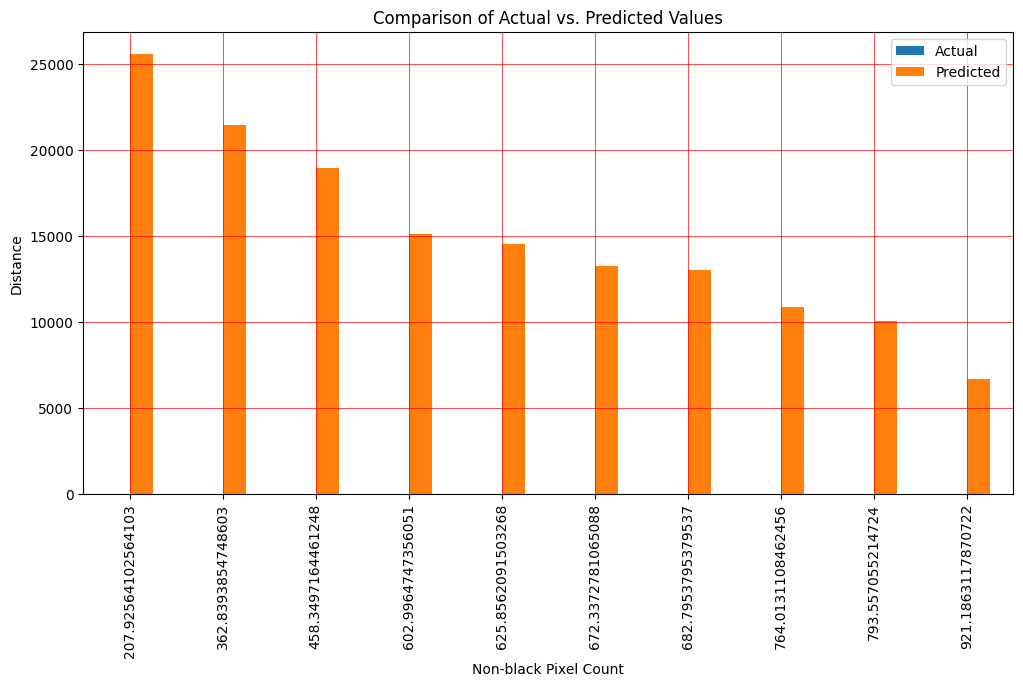

In [114]:
import matplotlib.pyplot as plt

def plot_predictions_vs_actuals(X_test, y_test, y_pred):
    # Create a DataFrame from test data
    df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    }, index=X_test.flatten())  # flatten X_test to use it as index if it's multi-dimensional

    # Select a few examples to plot
    sample_df = df.sample(n=10, random_state=42)  # Select 10 random examples

    # Sort the index to make the plot easier to understand
    sample_df = sample_df.sort_index()

    # Plotting
    sample_df.plot(kind='bar', figsize=(12, 6))
    plt.title('Comparison of Actual vs. Predicted Values')
    plt.xlabel('Non-black Pixel Count')
    plt.ylabel('Distance')
    plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    plt.show()

# Assuming `X_test`, `y_test`, and `y_pred` are defined as per previous discussion
plot_predictions_vs_actuals(X_test, y_test, y_pred)

# Other models and tests

## Polynomial Regression

Polynomial Regression MSE: 581353592.5382644
Polynomial Regression R^2: 0.061027626624237885


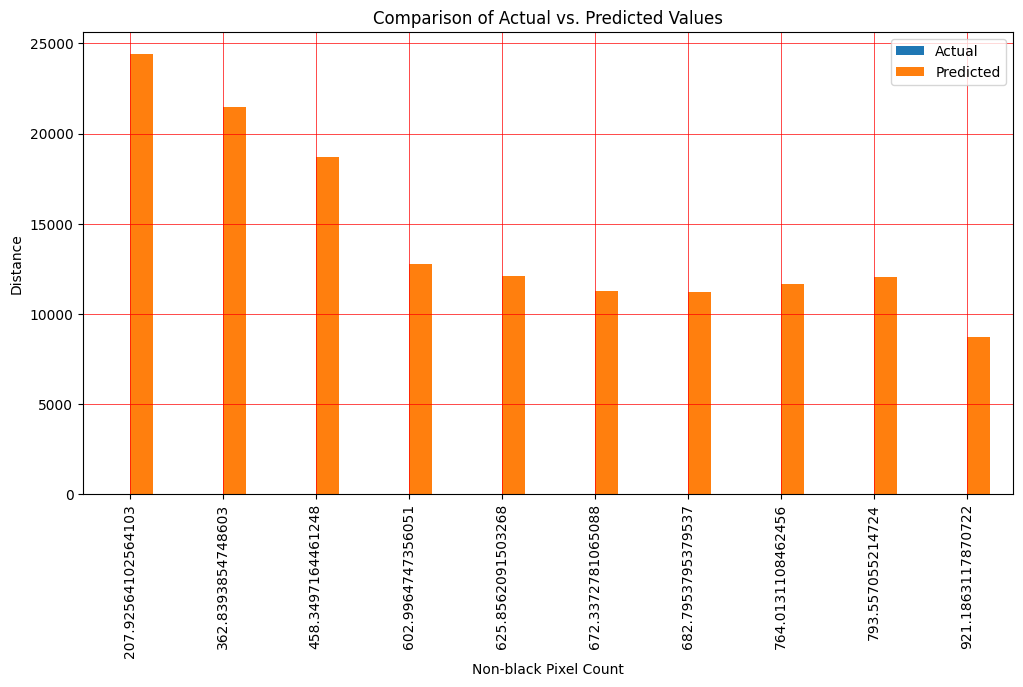

In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create polynomial features
degree = 5  # You can adjust the degree based on validation performance
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R^2:", r2_poly)

# Plot predictions vs actual
plot_predictions_vs_actuals(X_test, y_test, y_pred_poly)

## SVR

SVR with RBF Kernel MSE: 695451528.3314533
SVR with RBF Kernel R^2: -0.12325748134463455


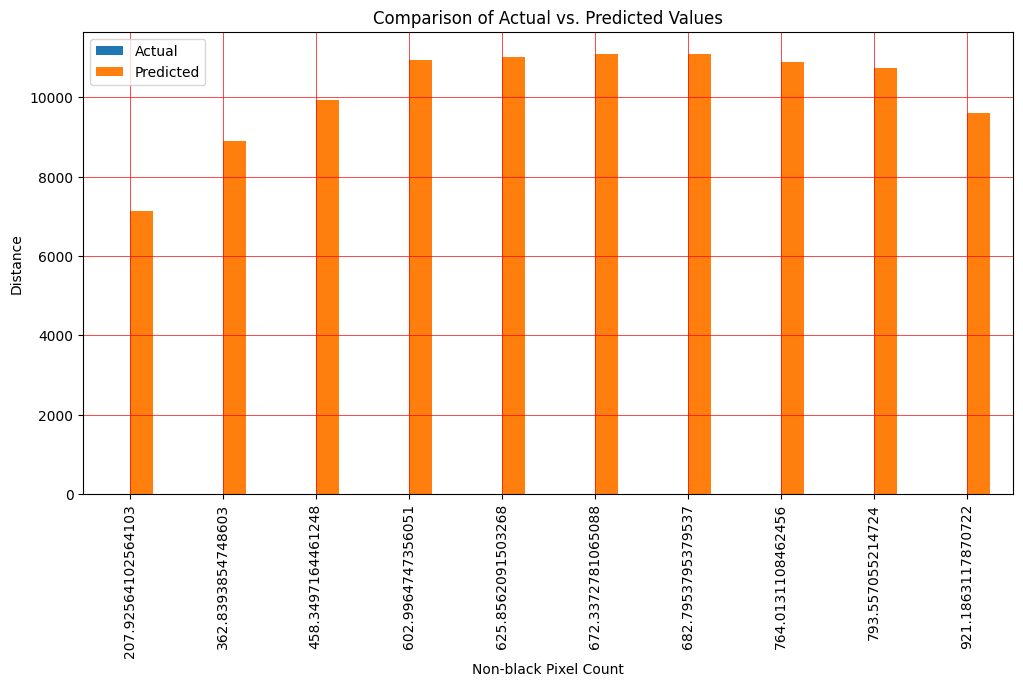

In [116]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Scale features: important for SVR and other algorithms that rely on distance calculations
scaler = StandardScaler()

# Reshape data for fitting
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the SVR model with the RBF kernel
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svr_rbf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr = svr_rbf.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR with RBF Kernel MSE:", mse_svr)
print("SVR with RBF Kernel R^2:", r2_svr)

# Plot predictions vs actual
plot_predictions_vs_actuals(X_test, y_test, y_pred_svr)

# Plotting the relationship between some extracted features and the target

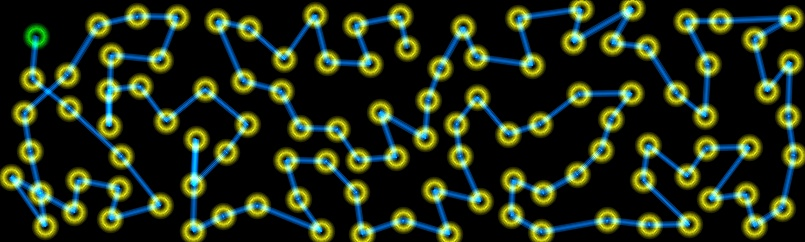

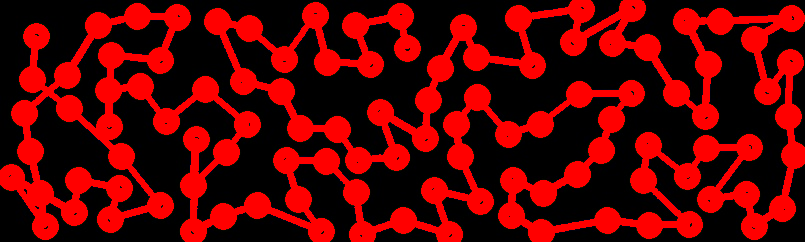

In [117]:
color_non_black_pixels('tsp-cv/18.jpg')

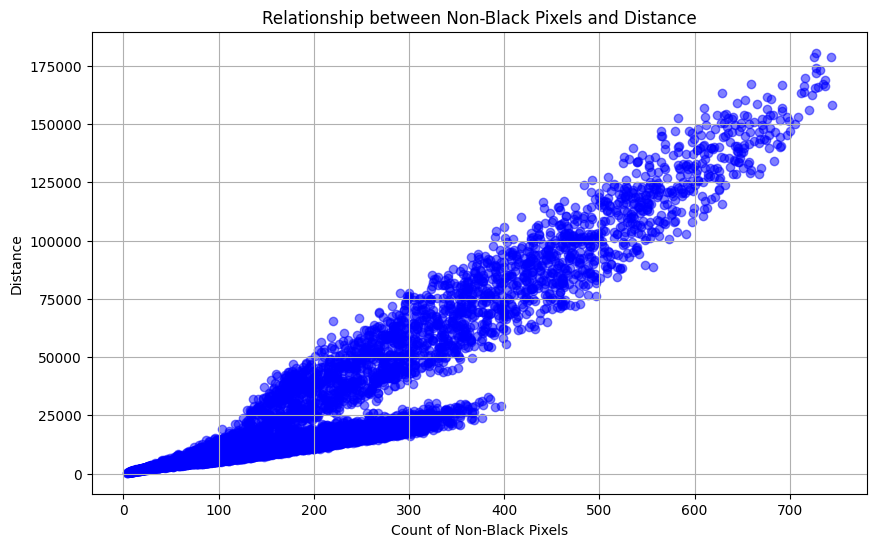

In [118]:
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined and appropriate for plotting
plt.figure(figsize=(10, 6))
plt.scatter(initial_df.apply(lambda row: row['non_black_pixels'] / row['width'], axis=1), y, color='blue', alpha=0.5)  # Plot as a scatter plot
plt.title('Relationship between Non-Black Pixels and Distance')
plt.xlabel('Count of Non-Black Pixels')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

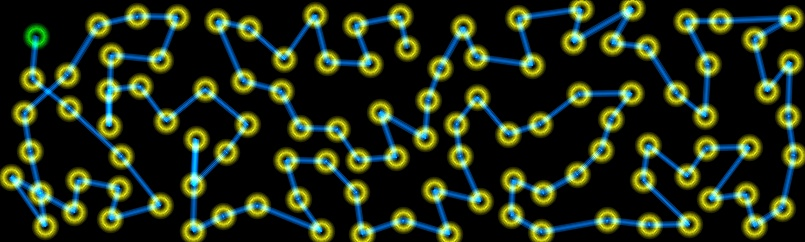

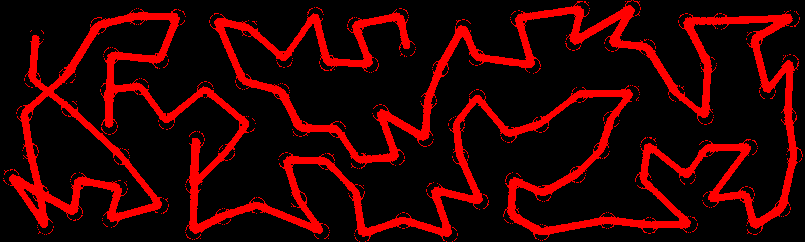

In [119]:
hex1 = "FF0000"  # Example hex color 1 (red)
hex2 = "00FF00"  # Example hex color 2 (green)
color_intermediary_shades_with_threshold('tsp-cv/18.jpg', hex1, hex2)

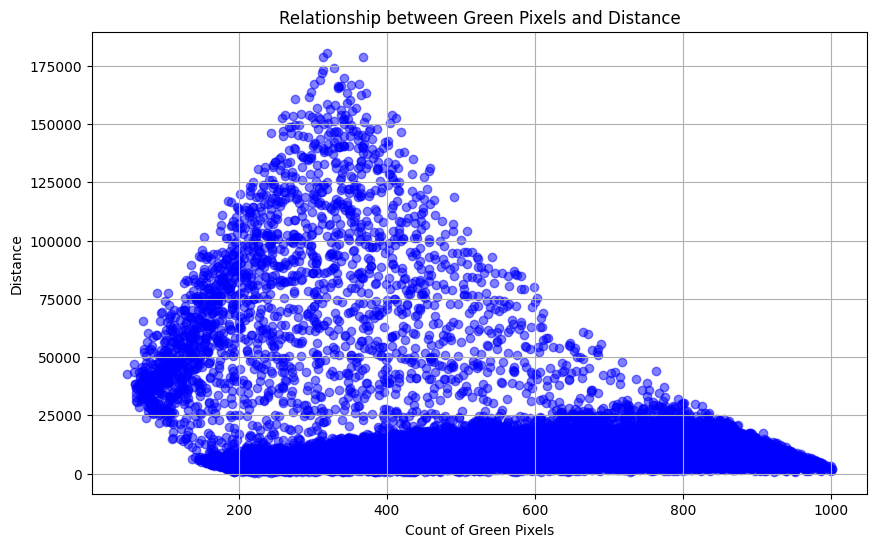

In [120]:
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined and appropriate for plotting
plt.figure(figsize=(10, 6))
plt.scatter(initial_df.apply(lambda row: row['intermediary_shade_pixels'] / row['width'], axis=1), y, color='blue', alpha=0.5)  # Plot as a scatter plot
plt.title('Relationship between Green Pixels and Distance')
plt.xlabel('Count of Green Pixels')
plt.ylabel('Distance')
plt.grid(True)
plt.show()